<a href="https://colab.research.google.com/github/lcbjrrr/quantai/blob/main/J_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
versioninfo()

Julia Version 1.10.8
Commit 4c16ff44be8 (2025-01-22 10:06 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, broadwell)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


# Descriptive Statistics

In [2]:


import Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("Plots")
Pkg.add("StatsPlots")
Pkg.add("FreqTables")

using CSV
using DataFrames
using Statistics
using Plots
using StatsPlots
using FreqTables

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [10745b16] + Statistics v1.10.0
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
   Installed Widgets ─────────── v0.6.7
   Installed Arpack_jll ──────── v3.5.1+1
   Installed TableOperations ─── v1.2.0
   Installed StatsPlots ──────── v0.15.7
   Installed MultivariateStats ─ v0.10.3
   Installed NearestNeighbors ── v0.4.21
   Installed Arpack ───

In [3]:
;wget https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/datasets/autoinsurance.csv

--2025-03-14 17:32:09--  https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/datasets/autoinsurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4669 (4.6K) [text/plain]
Saving to: ‘autoinsurance.csv’

     0K ....                                                  100% 31.4M=0s

2025-03-14 17:32:10 (31.4 MB/s) - ‘autoinsurance.csv’ saved [4669/4669]



In [4]:
#read csv:
auto=CSV.read("autoinsurance.csv", DataFrame)
print(auto)

50×12 DataFrame
 Row │ us_state  state           capital         pricelevel  Y2021  Y2022  Y2023  pop         lat      lon        Region     Division
     │ String3   String15        String15        String1     Int64  Int64  Int64  String15    Float64  Float64    String15   String31
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ MI        Michigan        Lansing         E            5740   4386   2352  10,077,331  42.7336   -84.5553  Midwest    East North Central
   2 │ RI        Rhode Island    Providence      E            1375   1197   1200  1,097,379   41.8309   -71.415   Northeast  New England
   3 │ NV        Nevada          Carson City     E            1033   1138   1164  3,104,614   39.1639  -119.766   West       Mountain
   4 │ FL        Florida         Tallahassee     E            2361   2072   1092  21,538,187  30.4381   -84.2813  South      South Atlantic
   5 │ NJ       

In [6]:
# Categorical Frequency
freq_cat = freqtable(auto.pricelevel)

4-element Named Vector{Int64}
Dim1  │ 
──────┼───
E     │  6
H     │  6
L     │ 16
M     │ 22

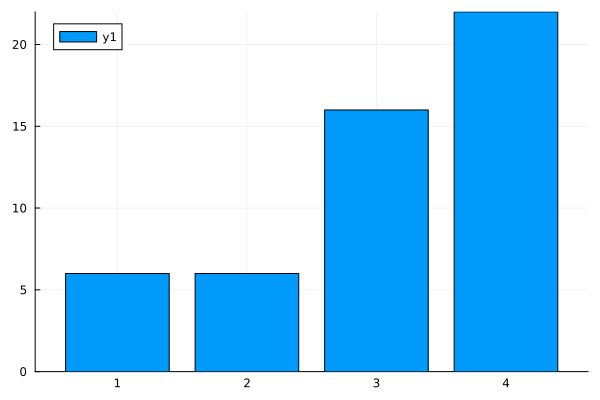

In [9]:
# Categorical histogram
bar(collect(keys(freq_cat)),collect(values(freq_cat)))

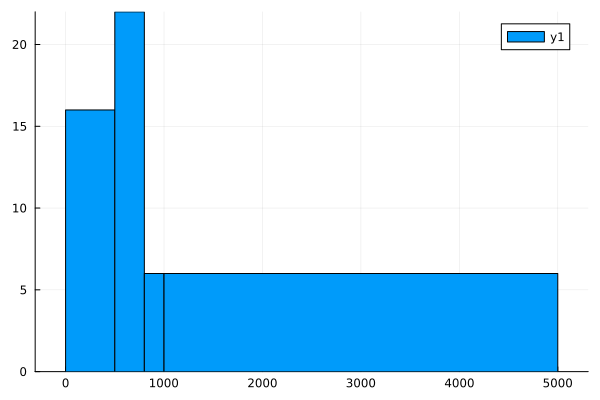

In [11]:
# Numerical histogram
histogram(auto.Y2023,bins=[0,500,800,1000,5000])

In [13]:
#Quartile calculation
describe(auto.Y2023)

Summary Stats:
Length:         50
Missing Count:  0
Mean:           690.000000
Std. Deviation: 324.197219
Minimum:        336.000000
1st Quartile:   483.000000
Median:         600.000000
3rd Quartile:   786.000000
Maximum:        2352.000000
Type:           Int64


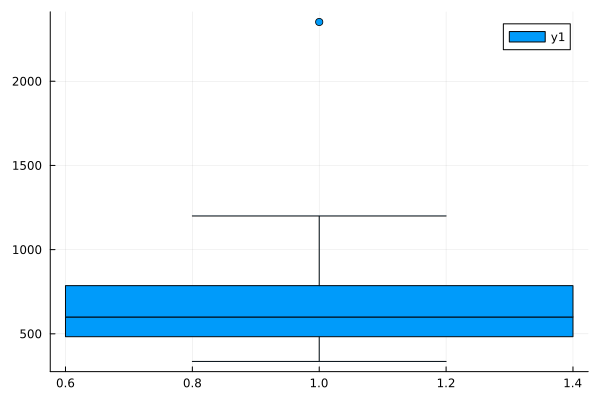

In [18]:
# Boxplot
boxplot(auto.Y2023)

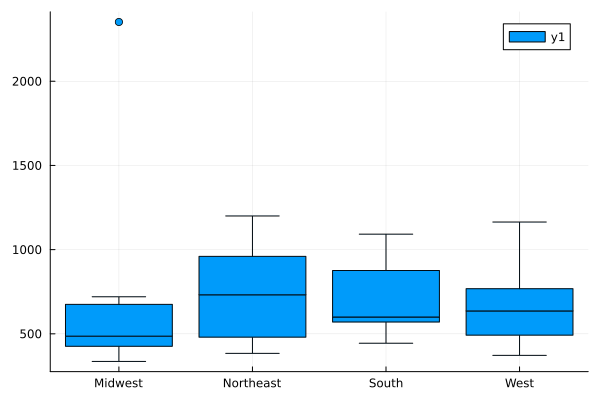

In [25]:
boxplot(auto.Region,auto.Y2023)

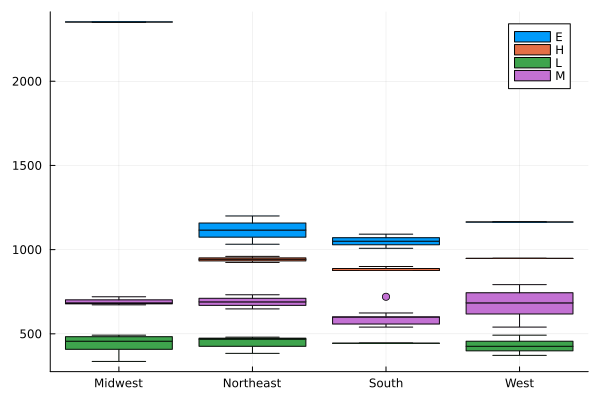

In [30]:
boxplot(auto.Region, auto.Y2023, group = auto.pricelevel)